# Dr. Frank's 2020 Election Analysis for Ohio -- All Counties

Based on Robert Lee's Python code from [his github repo](https://github.com/rlee32/election-fraud-ohio).

**Aggregate Voters by Age**

Show "turnout" that is the "normalized" fraction of voters by age.

The "normalization" is the ratio by age of those voting compared to registered voters.

efg, 2022-03-26.  

Capture all `Registered`, `Voted`, and `Key` data by county and write to csv files.  2022-04-02.

Assumes setup script already run:  `Ohio-Analysis-1-Setup.ipynb`

In [1]:
import datetime
start_time = datetime.datetime.now()
print (start_time)

2022-04-03 00:09:23.463332


In [2]:
import os
import sys
import json

import pandas as pd

from matplotlib import pyplot as plt   
%matplotlib inline

Ohio County codes

In [3]:
OhioCounty = pd.read_csv("Ohio-Codes.csv")
print(OhioCounty)

    Code      County
0      1       Adams
1      2       Allen
2      3     Ashland
3      4   Ashtabula
4      5      Athens
..   ...         ...
83    84  Washington
84    85       Wayne
85    86    Williams
86    87        Wood
87    88     Wyandot

[88 rows x 2 columns]


In [4]:
OhioCounty.dtypes

Code       int64
County    object
dtype: object

In [5]:
OhioRegistered = OhioCounty.copy(deep = True)
OhioVoted      = OhioCounty.copy(deep = True)
OhioKey        = OhioCounty.copy(deep = True)

Add columns to capture turnout data for ages 18 to 105 by county.

In [6]:
for age in range(18, 106, 1):
    OhioRegistered[f'Age{age:03d}'] = 0
    OhioVoted[f'Age{age:03d}']      = 0
    OhioKey[f'Age{age:03d}']        = 0

In [7]:
OhioKey.head(3)

,Code,County,Age018,Age019,Age020,Age021,Age022,Age023,Age024,Age025,...,Age096,Age097,Age098,Age099,Age100,Age101,Age102,Age103,Age104,Age105
0,1,Adams,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Allen,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Ashland,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1. Setup

Adapted from script `plot_turnout_by_age.py`

In [8]:
TOTAL_COUNTIES = 88  
JSON_FOLDER    = './jsonified/' 

In [9]:
ELECTION_YEAR = 2020 # choose presidential election years from 2000 - 2020

ELECTION_DAY = {
    2020: '03',
    2016: '08',
    2012: '06',
    2008: '04',
    2004: '02',
    2000: '07'
}

ELECTION_DATE = f'{ELECTION_YEAR}-11-{ELECTION_DAY[ELECTION_YEAR]}'
ELECTION_FIELD = f'general_{ELECTION_YEAR}'      

In [10]:
ELECTION_DATE

'2020-11-03'

In [11]:
ELECTION_FIELD

'general_2020'

## 1.1 "Helper" functions

In [12]:
def str_to_int(date):
    """Converts date in form YYYY-MM-DD to and integer of form YYYYMMDD. """
    return int(date.replace('-', ''))   

In [13]:
def get_age(start_date, end_date):
    """Returns integer age given dates in form YYYY-MM-DD. """
    start = str_to_int(start_date)
    end = str_to_int(end_date)
    diff = end - start
    if diff < 0:
        return diff / 10000.0
    else:
        return int(diff / 10000)         

In [14]:
def votes_by_age(county_id: int):
    """Reads voter data in json format and outputs votes aggregated by age for the specified election. """
    data = json.load(open(f'{JSON_FOLDER}/{county_id}.json', 'r'))
    by_age = {}
    for d in data:
        registration_age = get_age(d['registration_date'], ELECTION_DATE)
        if registration_age < 0:
            continue
            
        age = get_age(d['date_of_birth'], ELECTION_DATE)
        if age < 18:
            print(f'skipping underage {age}; data: {d}')
            continue
            
        if age > 105:    # lower this from 150 to 105
            print(f'skipping unreasonable age {age}; data: {d}')
            continue
            
        if age not in by_age:
            by_age[age] = {'registered': 0, 'voted': 0, 'active': 0}
            
        by_age[age]['registered'] += 1
        
        if d["voter_status"] == "ACTIVE":   
            by_age[age]['active'] += 1
            
        if d[ELECTION_FIELD].strip():
            by_age[age]['voted'] += 1
    return by_age                         

# 2. Plot all Counties

In [15]:
filenames = os.listdir(JSON_FOLDER)
MINIMUM_REGISTERED_VOTERS = 50 # per age group
MINIMUM_TOTAL_VOTERS = None # per county
isolated_colors = None # plots these county ids in different colors from the rest
print(f'plotting age groups with minimum of {MINIMUM_REGISTERED_VOTERS} registered voters.')

plotting age groups with minimum of 50 registered voters.


skipping unreasonable age 106; data: {'date_of_birth': '1914-10-10', 'registration_date': '2011-10-09', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 119; data: {'date_of_birth': '1901-01-01', 'registration_date': '2019-03-04', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2002-11-08', 'registration_date': '2020-06-02', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 119; data: {'date_of_birth': '1901-01-01', 'registration_date': '2020-11-03', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'gene

skipping unreasonable age 110; data: {'date_of_birth': '1910-08-30', 'registration_date': '2010-10-04', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-04-09', 'registration_date': '2020-10-26', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
county 17 has 24830 registered voters
skipping unreasonable age 106; data: {'date_of_birth': '1914-10-09', 'registration_date': '1900-01-01', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '2013-02-01', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 

skipping unreasonable age 106; data: {'date_of_birth': '1913-11-24', 'registration_date': '1978-03-31', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
county 19 has 32863 registered voters
skipping underage 17; data: {'date_of_birth': '2003-05-20', 'registration_date': '2020-08-28', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1969-11-01', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1969-11-01', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'genera

county 21 has 142913 registered voters
county 22 has 50961 registered voters
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1959-09-14', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1948-10-04', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping underage 17; data: {'date_of_birth': '2003-03-05', 'registration_date': '2020-03-05', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1968-09-24', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general

county 24 has 16131 registered voters
skipping underage 17; data: {'date_of_birth': '2003-08-28', 'registration_date': '2020-09-20', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1977-01-01', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 114; data: {'date_of_birth': '1906-08-15', 'registration_date': '1977-01-01', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1977-01-01', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'genera

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1977-01-01', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-07-10', 'registration_date': '2020-09-13', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1977-01-01', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 119; data: {'date_of_birth': '1900-11-04', 'registration_date': '2008-12-09', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2

skipping unreasonable age 113; data: {'date_of_birth': '1906-12-30', 'registration_date': '1992-08-20', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-18', 'registration_date': '2020-04-28', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '2016-10-11', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '2016-10-10', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': 'X', 'general_2020': '', 'general_2004': '', 'general_2008': '', '

skipping unreasonable age 107; data: {'date_of_birth': '1913-07-24', 'registration_date': '1961-08-24', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1962-03-16', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': 'X', 'general_2012': 'X'}
county 3 has 32706 registered voters
county 30 has 23124 registered voters
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_200

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', '

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 106; data: {'date_of_birth': '1914-05-19', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'g

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'ge

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1989-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'g

county 38 has 17199 registered voters
county 39 has 32615 registered voters
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '1957-09-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '1970-02-24', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '1968-09-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '1968-09-25', 'voter_status': 'CONFIRMATION', 'general_2000': 'X',

county 42 has 39456 registered voters
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1966-09-27', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 106; data: {'date_of_birth': '1914-09-22', 'registration_date': '2013-07-15', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1968-03-26', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping underage 17; data: {'date_of_birth': '2003-03-11', 'registration_date': '2020-09-22', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general

county 46 has 30082 registered voters
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1955-09-24', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1970-09-22', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1950-09-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1956-09-26', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020'

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1967-09-27', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '2012-11-06', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '2004-04-26', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 120; data: {'date_of_birth': '1900-02-05', 'registration_date': '2004-10-12', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1962-09-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1963-03-25', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1960-09-27', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1952-03-21', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1980-10-17', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-08-04', 'registration_date': '2010-06-22', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 112; data: {'date_of_birth': '1908-07-22', 'registration_date': '2008-08-11', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': '', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1980-10-17', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': '

county 55 has 71103 registered voters
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '2016-07-18', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-05-31', 'registration_date': '2020-09-23', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2002-11-08', 'registration_date': '2020-02-18', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2002-11-12', 'registration_date': '2020-09-30', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'ge

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1964-03-25', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1971-09-22', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1952-09-24', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1947-10-04', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'gener

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1961-06-17', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': '', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1971-07-17', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '1964-03-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping underage 17; data: {'date_of_birth': '2002-11-05', 'registration_date': '2020-09-08', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012'

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1954-09-20', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1965-07-17', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1965-07-21', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1968-03-21', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008':

skipping unreasonable age 107; data: {'date_of_birth': '1913-01-20', 'registration_date': '1964-09-22', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1964-03-23', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1955-08-25', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1964-03-24', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 

skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1967-09-27', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 106; data: {'date_of_birth': '1914-04-16', 'registration_date': '1944-10-06', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1968-08-17', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1956-09-12', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008

county 77 has 353479 registered voters
skipping unreasonable age 120; data: {'date_of_birth': '1900-08-20', 'registration_date': '1963-09-25', 'voter_status': 'ACTIVE', 'general_2000': 'X', 'general_2016': 'X', 'general_2020': 'X', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': 'X'}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1953-09-19', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 120; data: {'date_of_birth': '1900-01-01', 'registration_date': '2016-09-12', 'voter_status': 'CONFIRMATION', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2002-11-08', 'registration_date': '2020-02-13', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_200

skipping underage 17; data: {'date_of_birth': '2003-01-10', 'registration_date': '2020-10-15', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-02-17', 'registration_date': '2020-02-18', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping unreasonable age 220; data: {'date_of_birth': '1800-01-01', 'registration_date': '1964-09-23', 'voter_status': 'CONFIRMATION', 'general_2000': 'X', 'general_2016': '', 'general_2020': '', 'general_2004': 'X', 'general_2008': 'X', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-04-16', 'registration_date': '2018-05-15', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 

skipping underage 17; data: {'date_of_birth': '2003-03-09', 'registration_date': '2020-10-08', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-08-08', 'registration_date': '2020-10-05', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-03-10', 'registration_date': '2020-10-05', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_of_birth': '2003-05-21', 'registration_date': '2020-10-16', 'voter_status': 'ACTIVE', 'general_2000': '', 'general_2016': '', 'general_2020': '', 'general_2004': '', 'general_2008': '', 'general_2012': ''}
skipping underage 17; data: {'date_o

county 9 has 228375 registered voters
plotted 88 counties.


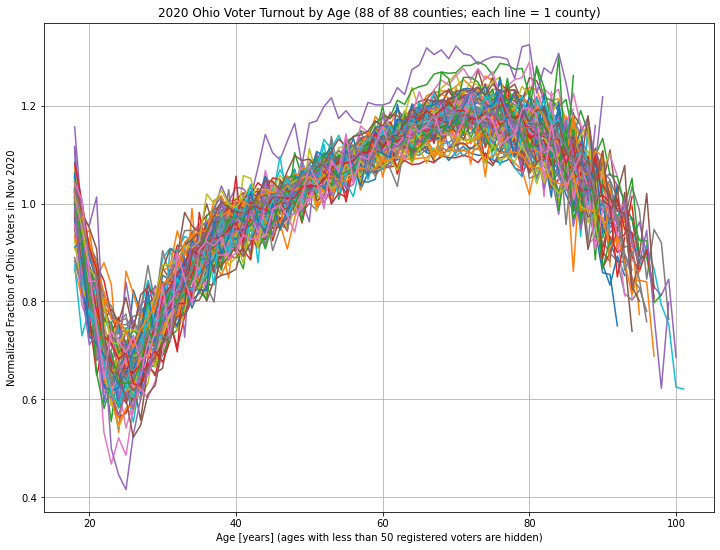

In [16]:
fig, ax = plt.subplots(figsize=(12, 9))

counties_plotted = 0
for f in filenames:
    if f[-5:] != '.json':
        continue
    try:
        county_id = int(f.split('.')[0])
        
        by_age = votes_by_age(county_id)
        
        sorted_by_age = list(by_age.items())
        sorted_by_age.sort()
        
        age        = [x[0]                    for x in sorted_by_age]
        registered = [by_age[x]['registered'] for x in age]
        voted      = [by_age[x]['voted']      for x in age]
        
        overall_turnout = sum(voted) / sum(registered)
        print(f'county {county_id} has {sum(registered)} registered voters')
        if MINIMUM_TOTAL_VOTERS is not None and sum(registered) < MINIMUM_TOTAL_VOTERS:
            continue
        ii = range(len(registered))
        key = [voted[i] / registered[i] / overall_turnout for i in ii]
        
        # kludge addition to dataframe
        for i in ii:
            if age[i] >= 18 and age[i] <= 105:
                OhioRegistered.iloc[county_id-1, age[i]-16] = registered[i]   
                OhioVoted.iloc[county_id-1, age[i]-16]      = voted[i]   
                OhioKey.iloc[county_id-1, age[i]-16]        = key[i]        
        
        if isolated_colors:
            if county_id in isolated_colors:
                plt.plot([age[i] for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS], [key[i] for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS], 'r')
            else:
                plt.plot([age[i] for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS], [key[i] for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS], 'b')
        else:
            plt.plot([age[i]     for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS], [key[i] for i in ii if registered[i] > MINIMUM_REGISTERED_VOTERS])
            
        counties_plotted += 1
    except:
        print(f'could not plot county_id {county_id}')

print(f'plotted {counties_plotted} counties.')

if MINIMUM_TOTAL_VOTERS is not None:
    print(f'skipped counties with less than {MINIMUM_TOTAL_VOTERS} voters.')
    
plt.xlabel(f'Age [years] (ages with less than {MINIMUM_REGISTERED_VOTERS} registered voters are hidden)')
plt.ylabel('Normalized Fraction of Ohio Voters in Nov 2020')
plt.title(f'{ELECTION_YEAR} Ohio Voter Turnout by Age ({counties_plotted} of {TOTAL_COUNTIES} counties; each line = 1 county)')

plt.grid()
plt.show()                      

# 3 Save turnout results

In [17]:
OhioRegistered.to_csv("Ohio-County-Registered-by-Age.csv", index = False)
OhioVoted.to_csv("Ohio-County-Voted-by-Age.csv", index = False)
OhioKey.to_csv("Ohio-County-Normalized-Turnout-by-Age.csv", index = False)

In [18]:
stop_time = datetime.datetime.now()
print (stop_time)
print ((stop_time - start_time), "elapsed time")

2022-04-03 00:10:16.855186
0:00:53.391854 elapsed time
